### Datan läpikäyntiä
Tutkitaan dataa ja tarkastellaan mitkä asiat vaikuttavat auton pitkään myyntiaikaa.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

df = pd.read_csv("C:/Users/Elias/Documents/Koulu/Aida_projekti/archive/used_cars_data.csv", nrows=100000, low_memory=False, index_col='vin')

df.head()

,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
vin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.0,Black,NaN,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,969,NaN,H4,2500.0,H4,None,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.0,305.0,None,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V6,Eiger Gray,NaN,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,NaN,73 in,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,NaN,NaN,True,NaN,18.4439,195.1 in,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.0,389227,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.0,389227,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


### Days on market

In [2]:
df['daysonmarket'].describe()

count    100000.000000
mean         77.682170
std         109.629986
min           0.000000
25%          14.000000
50%          36.000000
75%          82.000000
max        2150.000000
Name: daysonmarket, dtype: float64

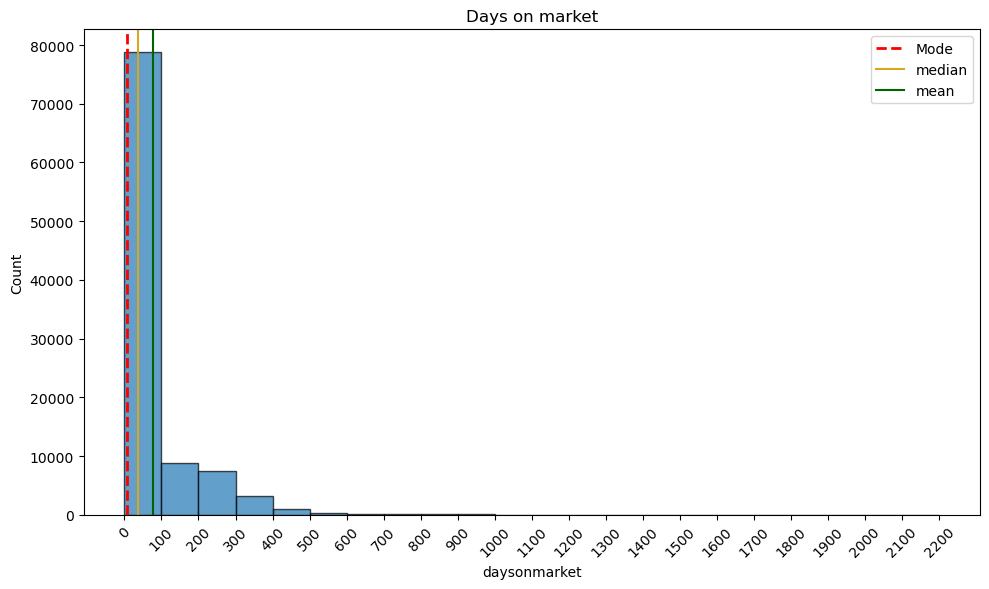

In [3]:
bins = np.arange(0, df['daysonmarket'].max() + 100, 100)

plt.figure(figsize=(10,6))
plt.hist(df['daysonmarket'], bins=bins, edgecolor="k", alpha=0.7)

plt.title('Days on market')

plt.axvline(df['daysonmarket'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(df['daysonmarket'].median(), color='goldenrod', label='median')
plt.axvline(df['daysonmarket'].mean(), color='darkgreen', label='mean')

plt.xticks(bins, rotation=45)
plt.legend()
plt.xlabel('daysonmarket')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [4]:
# Autot, joiden 'daysonmarket' on yli 100.
selected_cars = df[df['daysonmarket'] > 100]
selected_cars.describe()

,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,engine_displacement,highway_fuel_economy,horsepower,is_certified,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,vehicle_damage_category,year
count,17680.000000,0.0,21232.000000,21232.000000,20222.000000,17680.000000,20222.000000,0.0,21232.000000,2.123200e+04,21232.000000,20345.000000,5910.000000,2.123200e+04,21232.000000,21101.000000,21232.000000,0.0,21232.000000
mean,22.812330,NaN,247.817587,15398.366522,2721.338147,29.359615,247.189150,NaN,41.374668,2.620154e+08,-75.205005,17466.904104,1.775804,3.580953e+04,501.000094,4.117617,240279.054164,NaN,2018.434910
std,9.301711,NaN,132.616390,16340.769196,1199.476144,7.938873,95.244416,NaN,1.635962,1.168170e+07,4.125241,37463.099495,0.987478,2.820115e+04,1502.441237,0.558027,129942.526445,NaN,3.739517
min,8.000000,NaN,101.000000,922.000000,700.000000,12.000000,70.000000,NaN,18.346700,9.873062e+07,-122.320000,0.000000,1.000000,9.850000e+02,0.000000,1.000000,41593.000000,NaN,1930.000000
25%,18.000000,NaN,174.000000,6795.000000,2000.000000,25.000000,175.000000,NaN,40.758900,2.584711e+08,-74.457800,5.000000,1.000000,2.174475e+04,0.000000,3.666667,65697.000000,NaN,2019.000000
50%,22.000000,NaN,214.000000,8724.000000,2400.000000,29.000000,240.000000,NaN,41.098100,2.653513e+08,-73.872500,12.000000,2.000000,2.970400e+04,0.000000,4.225806,282218.000000,NaN,2020.000000
75%,25.000000,NaN,293.000000,11772.000000,3500.000000,32.000000,300.000000,NaN,42.331600,2.690375e+08,-73.082400,15305.000000,2.000000,4.416925e+04,0.000000,4.555556,337771.000000,NaN,2020.000000
max,127.000000,NaN,2150.000000,98108.000000,8400.000000,121.000000,808.000000,NaN,47.549200,2.733200e+08,-66.078500,785778.000000,12.000000,1.390000e+06,70750.000000,5.000000,440352.000000,NaN,2021.000000


### Days on market by price

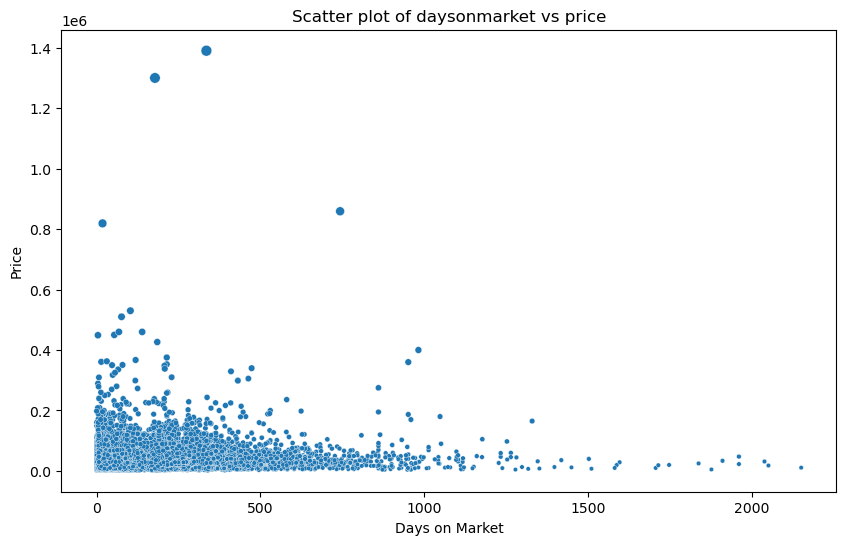

In [5]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='daysonmarket', y='price', size='price', sizes=(10, 60), legend=False)

plt.title('Scatter plot of daysonmarket vs price')
plt.xlabel('Days on Market')
plt.ylabel('Price')

plt.show()

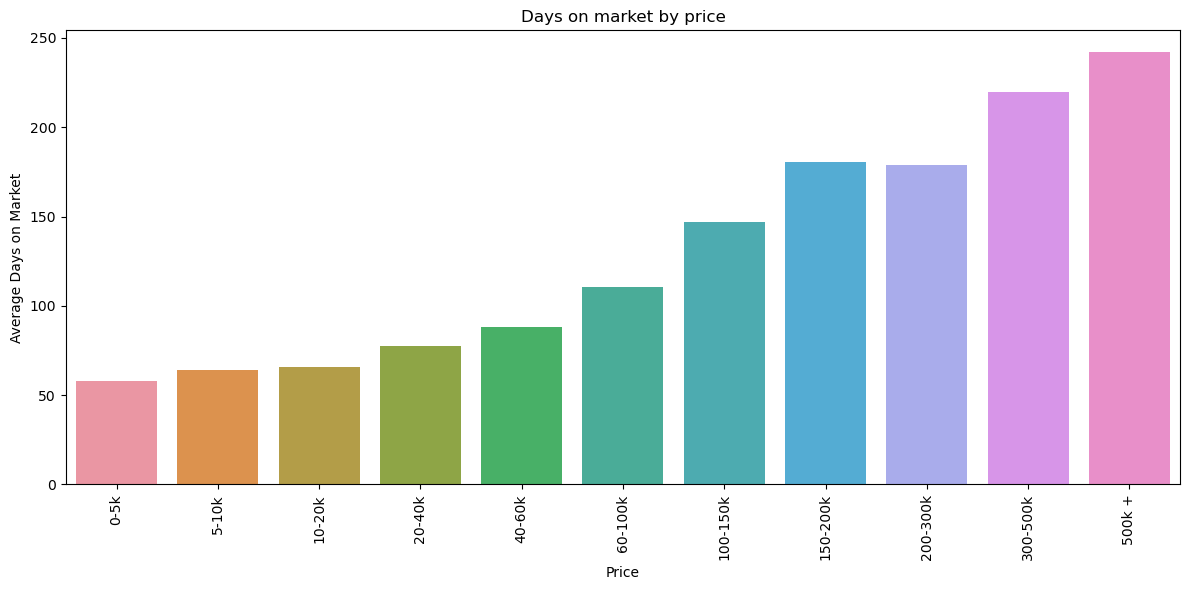

In [6]:
bins = [0, 5000, 10000, 20000, 40000, 60000, 100000, 150000, 200000, 300000, 500000, float('inf')]
labels = ["0-5k", "5-10k", "10-20k", "20-40k", "40-60k", "60-100k", "100-150k","150-200k",
          "200-300k","300-500k", "500k +"]

df['price_bin'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))

sns.barplot(data=df, x='price_bin', y='daysonmarket', ci=None)

plt.title('Days on market by price')
plt.xlabel('Price')
plt.ylabel('Average Days on Market')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Days on market by make name

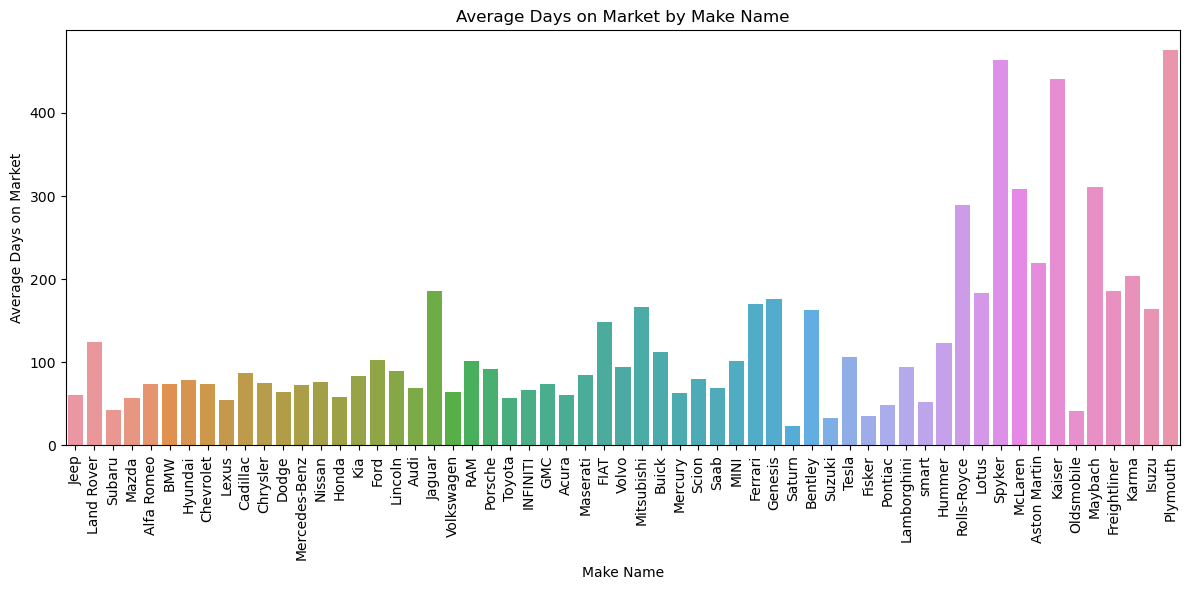

In [7]:
plt.figure(figsize=(12, 6))

sns.barplot(data=df, x='make_name', y='daysonmarket', ci=None)

plt.title('Average Days on Market by Make Name')
plt.xlabel('Make Name')
plt.ylabel('Average Days on Market')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [8]:
make_daysonmarket = df.groupby(['make_name', 'model_name']).mean()['daysonmarket'].sort_values(ascending=False)
make_daysonmarket.head()

make_name   model_name
Ferrari     550           1329.0
Alfa Romeo  4C            1252.0
McLaren     MP4-12C       1177.0
Ford        Model A       1151.0
Plymouth    Barracuda      904.0
Name: daysonmarket, dtype: float64

### Analyysia autonvalmistajasta
#### Automerkkejä joiden 'daysonmarket' on suuri:
Jaguar, Fiat, Volvo, Ferrari, Genesis, Mitsubishi, Bentley, Hummer, Rolls-Royce, Lotus, Spyker, McLaren, Aston Martin, Kaiser, Maybach

Tästä nähdään, että varsinkin auto eurooppalaiset urheilu- ja luksusautot ovat pitkään myytävänä. Myös vähemmän tunnetut automerkit ja autot, jotka eivät ole käytännöllisiä ovat myös pitkään myytävänä.

### Mileage

In [9]:
df['mileage'].value_counts().sum()

96443

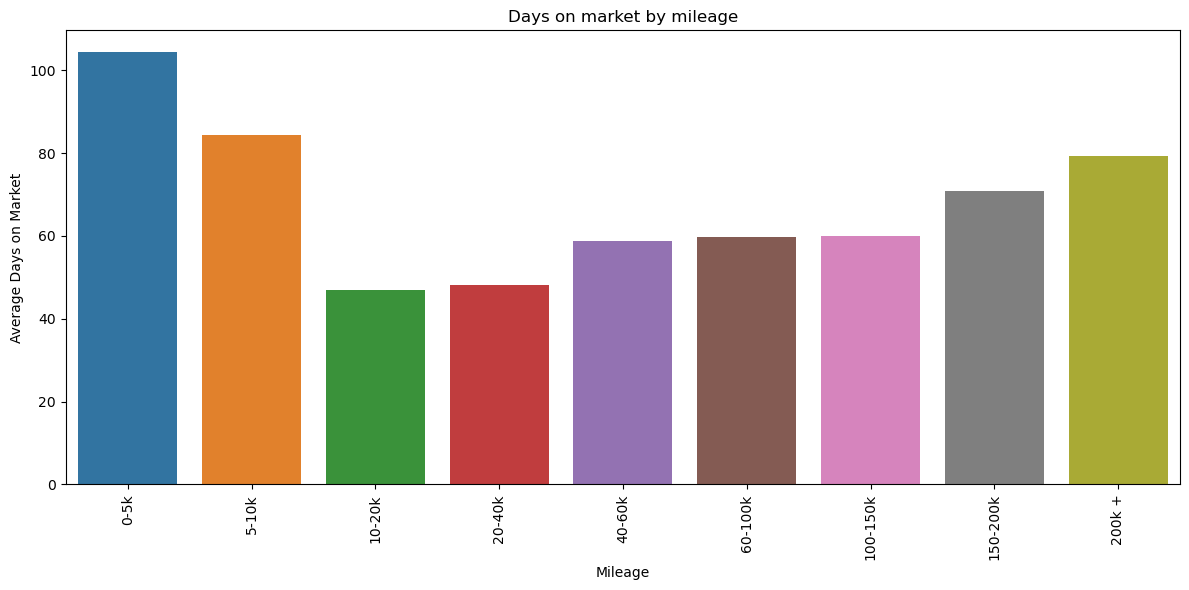

In [10]:
# Ylempää nähdään, että uniikkeja mailimääriä on todella suuri määrä. Jotta mittarilukemaa
# olisi helmpompi visualisoida, jaetaan mailit ryhmiin.
mileage_bins = [0, 5000, 10000, 20000, 40000, 60000, 100000, 150000, 200000, float('inf')]
mileage_labels = ["0-5k", "5-10k", "10-20k", "20-40k", "40-60k", "60-100k", "100-150k","150-200k", "200k +"]

df['mileage_bin'] = pd.cut(df['mileage'], bins=mileage_bins, labels=mileage_labels, right=False)

plt.figure(figsize=(12, 6))

sns.barplot(data=df, x='mileage_bin', y='daysonmarket', ci=None)

plt.title('Days on market by mileage')
plt.xlabel('Mileage')
plt.ylabel('Average Days on Market')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


### Analyysia mittarilukemasta

Autot, joiden mittarilukemat välillä 0-5 tuhatta pysyvät markkinoilla pisimpään. Tästä ylöspäin nouseva Kun ajokilometrit kasvavat 10-40 tuhanteen, keskimääräiset markkinoillaolopäivät lyhenevät merkittävästi.

### Average Days on market by fuel type

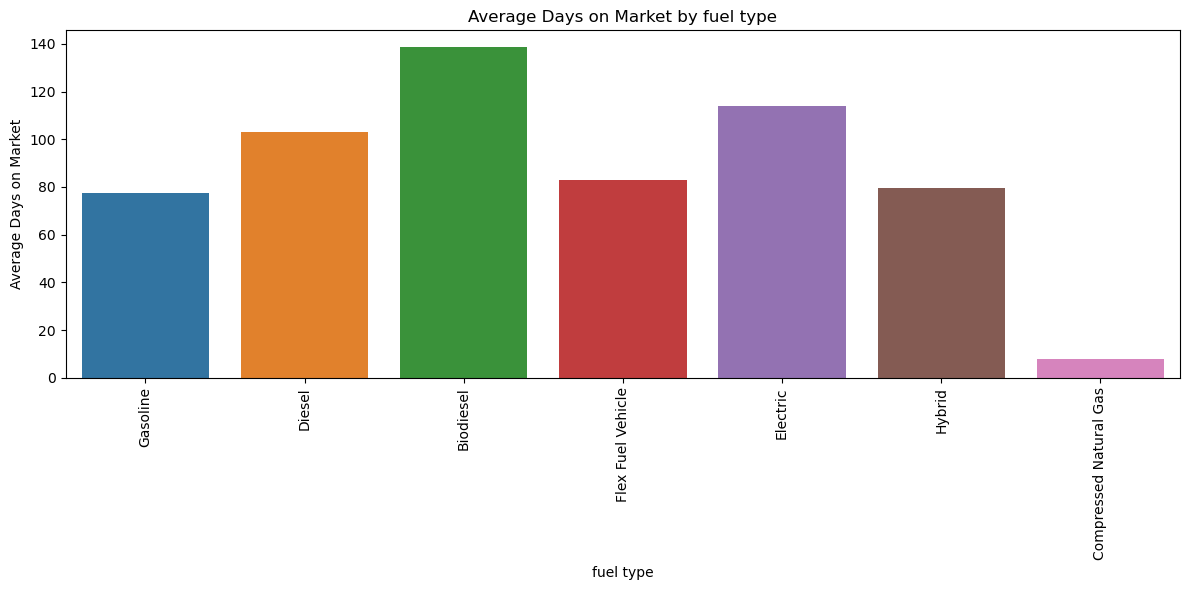

In [11]:
plt.figure(figsize=(12, 6))

sns.barplot(data=df, x='fuel_type', y='daysonmarket', ci=None)

plt.title('Average Days on Market by fuel type')
plt.xlabel('fuel type')
plt.ylabel('Average Days on Market')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Average Days on market by number of seats

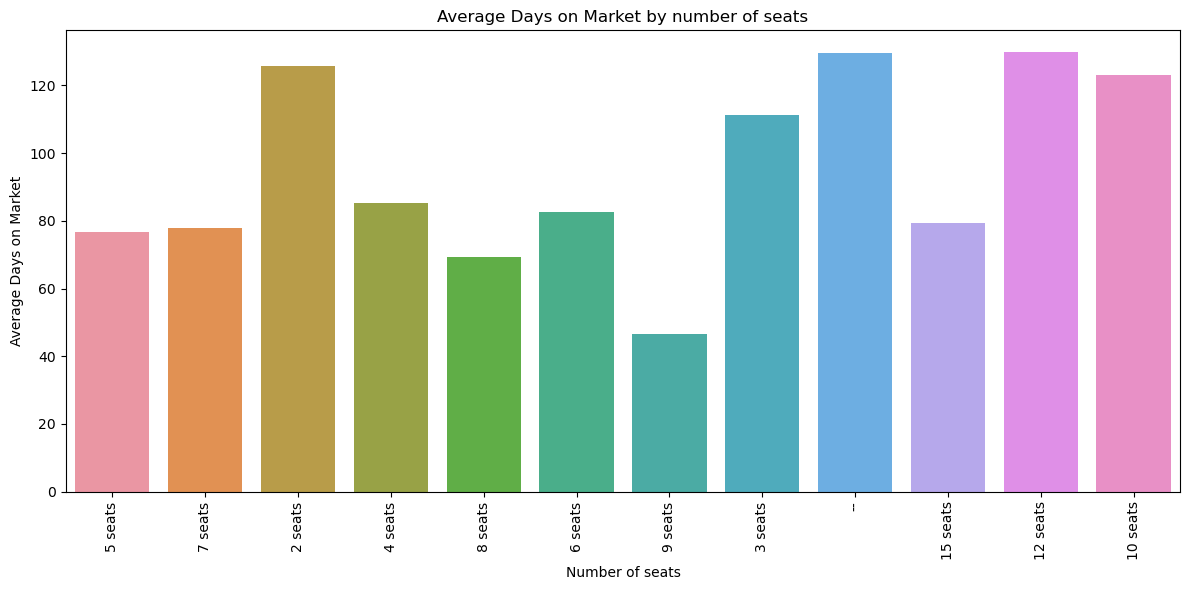

In [12]:
plt.figure(figsize=(12, 6))

sns.barplot(data=df, x='maximum_seating', y='daysonmarket', ci=None)

plt.title('Average Days on Market by number of seats')
plt.xlabel('Number of seats')
plt.ylabel('Average Days on Market')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Korrelaatioita

In [13]:
correlations = df[['daysonmarket', 'price', 'year', 'mileage']].corr()
correlations

,daysonmarket,price,year,mileage
daysonmarket,1.000000,0.118430,0.058476,-0.121170
price,0.118430,1.000000,0.406862,-0.475574
year,0.058476,0.406862,1.000000,-0.804102
mileage,-0.121170,-0.475574,-0.804102,1.000000


### Yhteenveto
Ajoneuvot, joiden ajokilometrit ovat alhaisemmat, joiden polttoainetyyppi on bensiiniä tai dieselpolttoainetta ja joissa on vähemmän istumapaikkoja (erityisesti 7 paikkaa), pysyvät markkinoilla yleensä lyhyemmän aikaa.